In [1]:
import requests
import time
from datetime import datetime
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

In [2]:
lat="24.8546842"
lon="67.0207055" 
start_time="2025-08-01T00:00"

In [3]:
time = datetime.now()
end_time = time.strftime("%Y-%m-%dT%H:%M")
print(f"Current Date and Time: {end_time}")


Current Date and Time: 2026-02-17T22:39


In [4]:
def get_historical_weather(lat, lon, start, end):
    
    url = f"https://air-quality-api.open-meteo.com/v1/air-quality?latitude={24.8546842}&longitude={67.0207055}&hourly=us_aqi,us_aqi_pm2_5,us_aqi_pm10,us_aqi_nitrogen_dioxide,us_aqi_ozone,us_aqi_sulphur_dioxide,us_aqi_carbon_monoxide&start_hour={start}&end_hour={end}"
    
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error {response.status_code}: {response.text}")
        return None

In [5]:
raw_json=get_historical_weather(lat, lon, start_time, end_time)

In [6]:
raw_json

{'latitude': 24.900002,
 'longitude': 67.0,
 'generationtime_ms': 3.1652450561523438,
 'utc_offset_seconds': 0,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'elevation': 8.0,
 'hourly_units': {'time': 'iso8601',
  'us_aqi': 'USAQI',
  'us_aqi_pm2_5': 'USAQI',
  'us_aqi_pm10': 'USAQI',
  'us_aqi_nitrogen_dioxide': 'USAQI',
  'us_aqi_ozone': 'USAQI',
  'us_aqi_sulphur_dioxide': 'USAQI',
  'us_aqi_carbon_monoxide': 'USAQI'},
 'hourly': {'time': ['2025-08-01T00:00',
   '2025-08-01T01:00',
   '2025-08-01T02:00',
   '2025-08-01T03:00',
   '2025-08-01T04:00',
   '2025-08-01T05:00',
   '2025-08-01T06:00',
   '2025-08-01T07:00',
   '2025-08-01T08:00',
   '2025-08-01T09:00',
   '2025-08-01T10:00',
   '2025-08-01T11:00',
   '2025-08-01T12:00',
   '2025-08-01T13:00',
   '2025-08-01T14:00',
   '2025-08-01T15:00',
   '2025-08-01T16:00',
   '2025-08-01T17:00',
   '2025-08-01T18:00',
   '2025-08-01T19:00',
   '2025-08-01T20:00',
   '2025-08-01T21:00',
   '2025-08-01T22:00',
   '2025-08-01T23:

In [7]:
df = pd.DataFrame(raw_json['hourly'])

In [8]:
df

,time,us_aqi,us_aqi_pm2_5,us_aqi_pm10,us_aqi_nitrogen_dioxide,us_aqi_ozone,us_aqi_sulphur_dioxide,us_aqi_carbon_monoxide
0,2025-08-01T00:00,81,81,58,4,18,5,2
1,2025-08-01T01:00,80,80,58,4,18,5,2
2,2025-08-01T02:00,80,80,57,5,19,6,2
3,2025-08-01T03:00,79,79,56,5,20,6,2
4,2025-08-01T04:00,79,79,56,4,20,7,2
...,...,...,...,...,...,...,...,...
4818,2026-02-17T18:00,88,88,47,26,42,12,11
4819,2026-02-17T19:00,89,89,47,21,35,11,12
4820,2026-02-17T20:00,90,90,48,13,30,9,13
4821,2026-02-17T21:00,91,91,48,6,26,8,13


In [9]:
df.isna().sum()

time                       0
us_aqi                     0
us_aqi_pm2_5               0
us_aqi_pm10                0
us_aqi_nitrogen_dioxide    0
us_aqi_ozone               0
us_aqi_sulphur_dioxide     0
us_aqi_carbon_monoxide     0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df['time'] = pd.to_datetime(df['time'])

In [12]:
df.head()

,time,us_aqi,us_aqi_pm2_5,us_aqi_pm10,us_aqi_nitrogen_dioxide,us_aqi_ozone,us_aqi_sulphur_dioxide,us_aqi_carbon_monoxide
0,2025-08-01 00:00:00,81,81,58,4,18,5,2
1,2025-08-01 01:00:00,80,80,58,4,18,5,2
2,2025-08-01 02:00:00,80,80,57,5,19,6,2
3,2025-08-01 03:00:00,79,79,56,5,20,6,2
4,2025-08-01 04:00:00,79,79,56,4,20,7,2


In [13]:
df.columns

Index(['time', 'us_aqi', 'us_aqi_pm2_5', 'us_aqi_pm10',
       'us_aqi_nitrogen_dioxide', 'us_aqi_ozone', 'us_aqi_sulphur_dioxide',
       'us_aqi_carbon_monoxide'],
      dtype='object')

In [14]:
df.columns = df.columns.str.replace('us_', '', regex=False)
print(df.columns)

Index(['time', 'aqi', 'aqi_pm2_5', 'aqi_pm10', 'aqi_nitrogen_dioxide',
       'aqi_ozone', 'aqi_sulphur_dioxide', 'aqi_carbon_monoxide'],
      dtype='object')


In [15]:
df.columns = [col.replace('aqi_', '') if col.startswith('aqi_') else col for col in df.columns]

print(df.columns)

Index(['time', 'aqi', 'pm2_5', 'pm10', 'nitrogen_dioxide', 'ozone',
       'sulphur_dioxide', 'carbon_monoxide'],
      dtype='object')


In [16]:
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour

print(df[['time', 'year', 'month', 'day', 'hour']].head())

                 time  year  month  day  hour
0 2025-08-01 00:00:00  2025      8    1     0
1 2025-08-01 01:00:00  2025      8    1     1
2 2025-08-01 02:00:00  2025      8    1     2
3 2025-08-01 03:00:00  2025      8    1     3
4 2025-08-01 04:00:00  2025      8    1     4


In [17]:
df['day_of_week'] = df['time'].dt.dayofweek

# .dt.dayofweek returns 0 for Monday and 6 for Sunday. 
# 5 (Saturday) and 6 (Sunday) are considered weekends.
df['weekend'] = (df['day_of_week'] >= 5).astype(int)

# Display the result
print(df[['time', 'day_of_week', 'weekend']].sample(20))

                    time  day_of_week  weekend
2792 2025-11-25 08:00:00            1        0
3648 2025-12-31 00:00:00            2        0
3547 2025-12-26 19:00:00            4        0
3393 2025-12-20 09:00:00            5        1
1702 2025-10-10 22:00:00            4        0
87   2025-08-04 15:00:00            0        0
254  2025-08-11 14:00:00            0        0
709  2025-08-30 13:00:00            5        1
3347 2025-12-18 11:00:00            3        0
1547 2025-10-04 11:00:00            5        1
1326 2025-09-25 06:00:00            3        0
2116 2025-10-28 04:00:00            1        0
2647 2025-11-19 07:00:00            2        0
2492 2025-11-12 20:00:00            2        0
3290 2025-12-16 02:00:00            1        0
2230 2025-11-01 22:00:00            5        1
521  2025-08-22 17:00:00            4        0
338  2025-08-15 02:00:00            4        0
1906 2025-10-19 10:00:00            6        1
4721 2026-02-13 17:00:00            4        0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4823 entries, 0 to 4822
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              4823 non-null   datetime64[ns]
 1   aqi               4823 non-null   int64         
 2   pm2_5             4823 non-null   int64         
 3   pm10              4823 non-null   int64         
 4   nitrogen_dioxide  4823 non-null   int64         
 5   ozone             4823 non-null   int64         
 6   sulphur_dioxide   4823 non-null   int64         
 7   carbon_monoxide   4823 non-null   int64         
 8   year              4823 non-null   int32         
 9   month             4823 non-null   int32         
 10  day               4823 non-null   int32         
 11  hour              4823 non-null   int32         
 12  day_of_week       4823 non-null   int32         
 13  weekend           4823 non-null   int32         
dtypes: datetime64[ns](1), in

In [19]:
df

,time,aqi,pm2_5,pm10,nitrogen_dioxide,ozone,sulphur_dioxide,carbon_monoxide,year,month,day,hour,day_of_week,weekend
0,2025-08-01 00:00:00,81,81,58,4,18,5,2,2025,8,1,0,4,0
1,2025-08-01 01:00:00,80,80,58,4,18,5,2,2025,8,1,1,4,0
2,2025-08-01 02:00:00,80,80,57,5,19,6,2,2025,8,1,2,4,0
3,2025-08-01 03:00:00,79,79,56,5,20,6,2,2025,8,1,3,4,0
4,2025-08-01 04:00:00,79,79,56,4,20,7,2,2025,8,1,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4818,2026-02-17 18:00:00,88,88,47,26,42,12,11,2026,2,17,18,1,0
4819,2026-02-17 19:00:00,89,89,47,21,35,11,12,2026,2,17,19,1,0
4820,2026-02-17 20:00:00,90,90,48,13,30,9,13,2026,2,17,20,1,0
4821,2026-02-17 21:00:00,91,91,48,6,26,8,13,2026,2,17,21,1,0


In [20]:
df.describe()

,time,aqi,pm2_5,pm10,nitrogen_dioxide,ozone,sulphur_dioxide,carbon_monoxide,year,month,day,hour,day_of_week,weekend
count,4823,4823.000000,4823.00000,4823.000000,4823.000000,4823.000000,4823.000000,4823.000000,4823.000000,4823.000000,4823.000000,4823.000000,4823.000000,4823.000000
mean,2025-11-09 11:00:00,95.235123,94.29069,42.808003,13.313913,36.230977,10.143272,6.773170,2025.238648,7.936554,15.258345,11.497616,3.005391,0.288617
min,2025-08-01 00:00:00,38.000000,38.00000,11.000000,0.000000,2.000000,3.000000,1.000000,2025.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2025-09-20 05:30:00,77.000000,76.00000,33.000000,5.000000,19.000000,7.000000,3.000000,2025.000000,8.000000,8.000000,5.500000,1.000000,0.000000
50%,2025-11-09 11:00:00,91.000000,90.00000,42.000000,10.000000,29.000000,9.000000,6.000000,2025.000000,9.000000,15.000000,11.000000,3.000000,0.000000
75%,2025-12-29 16:30:00,112.000000,110.00000,52.000000,19.000000,44.000000,12.000000,9.000000,2025.000000,11.000000,23.000000,17.000000,5.000000,1.000000
max,2026-02-17 22:00:00,161.000000,161.00000,107.000000,71.000000,159.000000,36.000000,30.000000,2026.000000,12.000000,31.000000,23.000000,6.000000,1.000000
std,NaN,25.214416,24.78321,13.851034,11.356910,27.103381,5.164486,4.050896,0.426301,3.895370,8.800406,6.921641,2.008890,0.453166


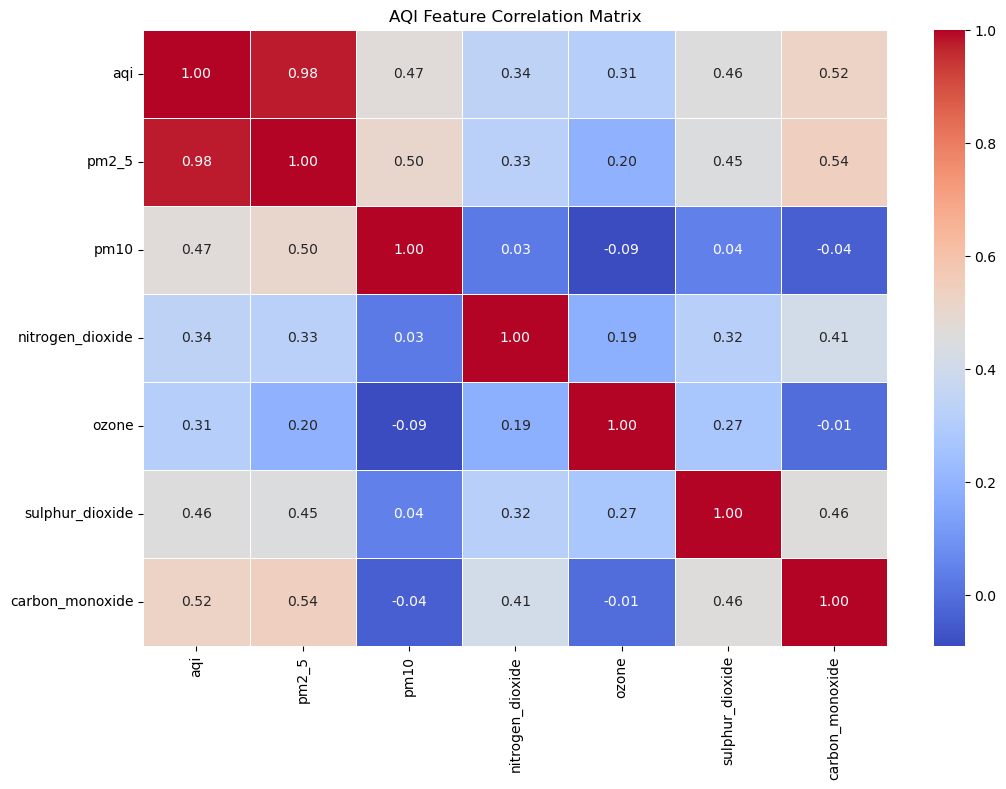

In [21]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_df.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix, 
    annot=True,      # Shows the correlation values in the cells
    fmt=".2f",       # Rounds values to 2 decimal places
    cmap='coolwarm', # Blue for negative, Red for positive correlation
    linewidths=0.5
)

plt.title('AQI Feature Correlation Matrix')

plt.show()

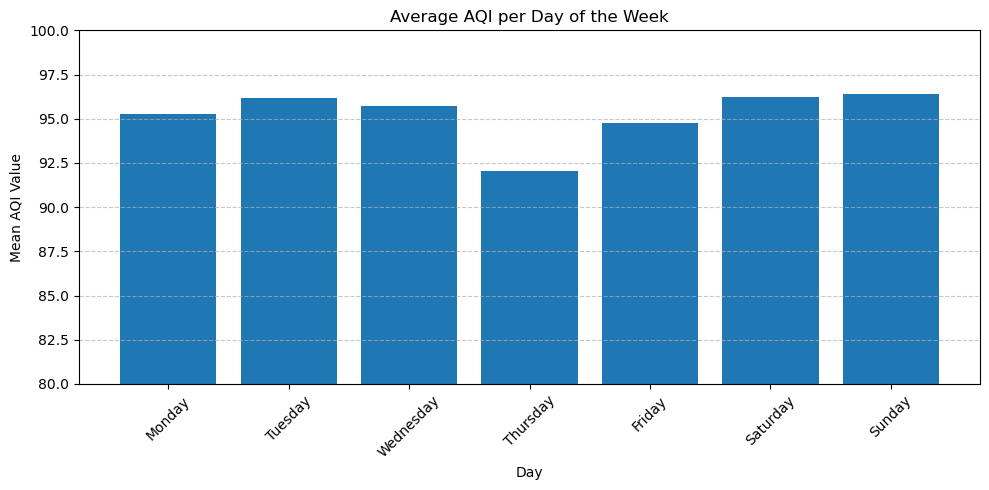

In [22]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 2. Group by Day and calculate the Mean
each_day_avg = df.groupby('day_of_week')['aqi'].mean()

# 3. Plot: Average AQI per Day
plt.figure(figsize=(10, 5))
plt.bar(day_order, each_day_avg.values)
plt.ylim(80, 100)
plt.title('Average AQI per Day of the Week')
plt.ylabel('Mean AQI Value')
plt.xlabel('Day')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

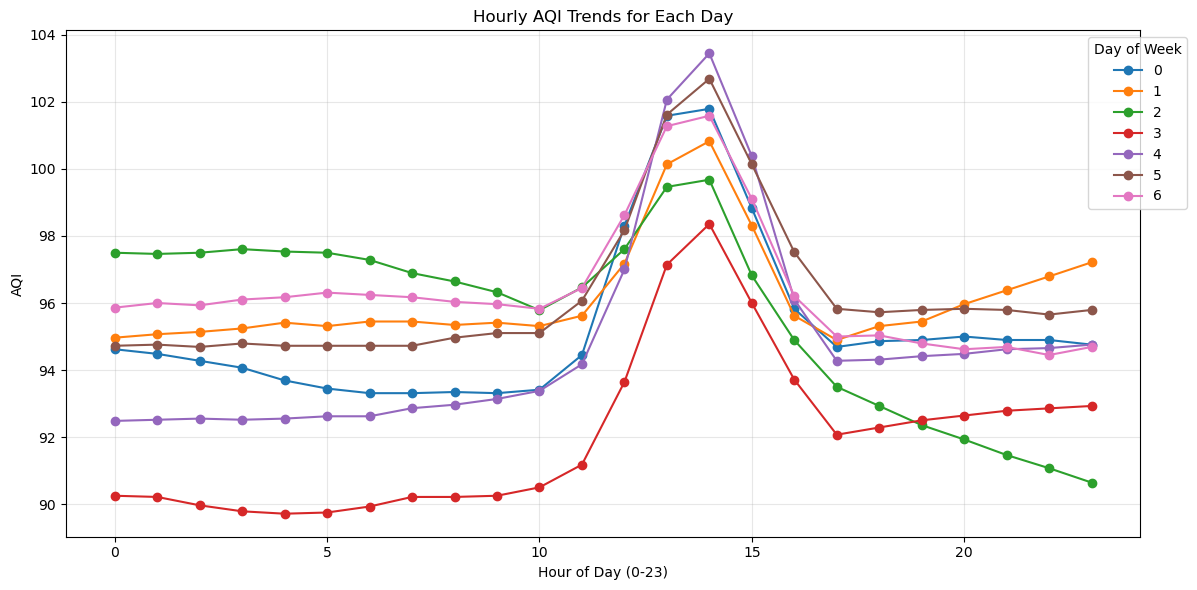

In [23]:
# Advanced Plot: Hourly trend for each day
df['hour'] = df['time'].dt.hour
hourly_pivot = df.pivot_table(values='aqi', index='hour', columns='day_of_week', aggfunc='mean')

hourly_pivot.plot(figsize=(12, 6), marker='o')
plt.title('Hourly AQI Trends for Each Day')
plt.ylabel('AQI')
plt.xlabel('Hour of Day (0-23)')
plt.legend(title='Day of Week', bbox_to_anchor=(1.05, 1))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

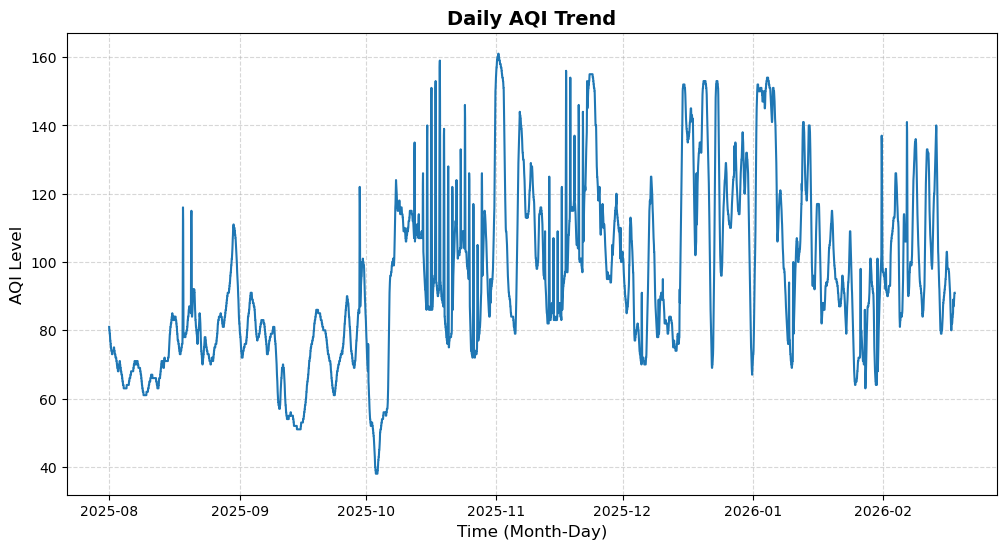

In [24]:
daily_aqi = df.groupby(['year', 'month', 'day'])[['day_of_week','weekend','aqi', 'pm2_5', 'pm10', 'nitrogen_dioxide', 'ozone', 'sulphur_dioxide', 'carbon_monoxide']].mean().reset_index()
daily_aqi['date'] = pd.to_datetime(daily_aqi[['year', 'month', 'day']])
daily_aqi = daily_aqi.sort_values('date')

plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['aqi'])

plt.title('Daily AQI Trend', fontsize=14, fontweight='bold')
plt.xlabel('Time (Month-Day)', fontsize=12)
plt.ylabel('AQI Level', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Format x-axis to be readable (e.g., "01-31 03:00")
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
#plt.xticks(rotation=45)

plt.show()

In [25]:
monthly_aqi=df.groupby("month")[['aqi', 'pm2_5', 'pm10', 'nitrogen_dioxide', 'ozone', 
                                 'sulphur_dioxide', 'carbon_monoxide']].mean()
monthly_aqi

,aqi,pm2_5,pm10,nitrogen_dioxide,ozone,sulphur_dioxide,carbon_monoxide
month,,,,,,,
1,103.528226,102.932796,43.803763,15.611559,38.184140,11.126344,9.001344
2,103.157248,102.879607,46.093366,14.823096,38.292383,10.017199,7.098280
8,76.206989,75.881720,47.708333,7.353495,26.275538,7.298387,3.400538
9,73.587500,73.438889,43.338889,8.536111,22.516667,7.030556,3.106944
10,93.322581,90.000000,40.534946,12.018817,47.153226,8.560484,6.127688
11,113.051389,111.594444,42.526389,17.850000,43.184722,13.304167,8.997222
12,107.256720,107.083333,37.146505,17.680108,38.725806,13.610215,9.780914


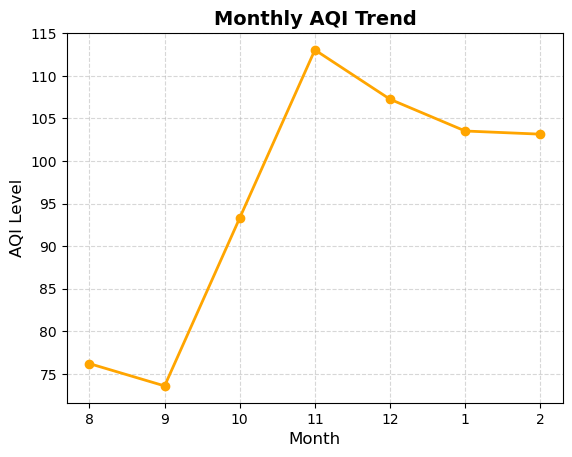

In [26]:
month_order = [8, 9, 10, 11, 12, 1, 2]

monthly_aqi_ordered = monthly_aqi.reindex(month_order)

# We convert the index to strings so Matplotlib treats them as labels in the exact order provided
plt.plot(monthly_aqi_ordered.index.astype(str), monthly_aqi_ordered["aqi"], 
         marker='o', linestyle='-', color='orange', linewidth=2)

plt.title('Monthly AQI Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('AQI Level', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

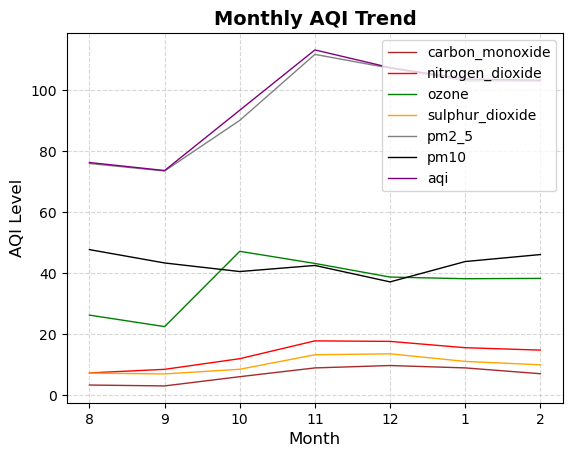

In [27]:
month_order = [8, 9, 10, 11, 12, 1, 2]

monthly_aqi_ordered = monthly_aqi.reindex(month_order)

# We convert the index to strings so Matplotlib treats them as labels in the exact order provided
plt.plot(monthly_aqi_ordered.index.astype(str), monthly_aqi_ordered['carbon_monoxide'], 
         linestyle='-', color='brown', linewidth=1)
plt.plot(monthly_aqi_ordered.index.astype(str), monthly_aqi_ordered['nitrogen_dioxide'], 
         linestyle='-', color='red', linewidth=1)
plt.plot(monthly_aqi_ordered.index.astype(str), monthly_aqi_ordered['ozone'], 
         linestyle='-', color='green', linewidth=1)
plt.plot(monthly_aqi_ordered.index.astype(str), monthly_aqi_ordered['sulphur_dioxide'], 
         linestyle='-', color='orange', linewidth=1)
plt.plot(monthly_aqi_ordered.index.astype(str), monthly_aqi_ordered['pm2_5'], 
         linestyle='-', color='gray', linewidth=1)
plt.plot(monthly_aqi_ordered.index.astype(str), monthly_aqi_ordered['pm10'], 
         linestyle='-', color='black', linewidth=1)
plt.plot(monthly_aqi_ordered.index.astype(str), monthly_aqi_ordered['aqi'], 
         linestyle='-', color='purple', linewidth=1)

plt.legend(['carbon_monoxide','nitrogen_dioxide','ozone','sulphur_dioxide','pm2_5','pm10','aqi'])

plt.title('Monthly AQI Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('AQI Level', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [28]:
df

,time,aqi,pm2_5,pm10,nitrogen_dioxide,ozone,sulphur_dioxide,carbon_monoxide,year,month,day,hour,day_of_week,weekend
0,2025-08-01 00:00:00,81,81,58,4,18,5,2,2025,8,1,0,4,0
1,2025-08-01 01:00:00,80,80,58,4,18,5,2,2025,8,1,1,4,0
2,2025-08-01 02:00:00,80,80,57,5,19,6,2,2025,8,1,2,4,0
3,2025-08-01 03:00:00,79,79,56,5,20,6,2,2025,8,1,3,4,0
4,2025-08-01 04:00:00,79,79,56,4,20,7,2,2025,8,1,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4818,2026-02-17 18:00:00,88,88,47,26,42,12,11,2026,2,17,18,1,0
4819,2026-02-17 19:00:00,89,89,47,21,35,11,12,2026,2,17,19,1,0
4820,2026-02-17 20:00:00,90,90,48,13,30,9,13,2026,2,17,20,1,0
4821,2026-02-17 21:00:00,91,91,48,6,26,8,13,2026,2,17,21,1,0


### Finding optimum lag for aqi prediction

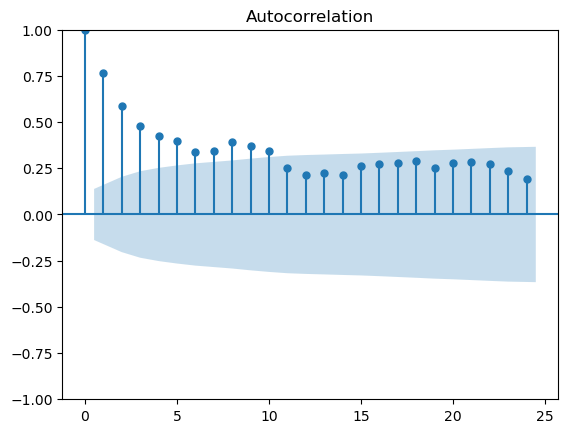

In [30]:
acf_plot=plot_acf(daily_aqi.aqi)

#### it is autoregressive

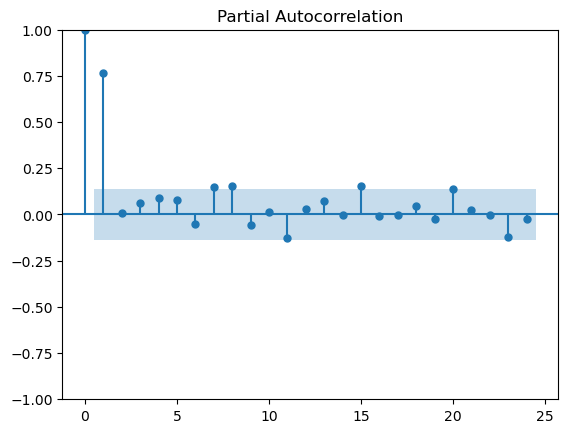

In [32]:
pacf_plot=plot_pacf(daily_aqi.aqi)

#### lag 1 is useful rest are not

In [34]:
daily_aqi

,year,month,day,day_of_week,weekend,aqi,pm2_5,pm10,nitrogen_dioxide,ozone,sulphur_dioxide,carbon_monoxide,date
0,2025,8,1,4.0,0.0,75.750000,75.750000,53.375000,5.250000,24.583333,6.041667,2.208333,2025-08-01
1,2025,8,2,5.0,1.0,72.375000,72.375000,53.750000,5.541667,23.583333,5.666667,2.208333,2025-08-02
2,2025,8,3,6.0,1.0,68.916667,68.916667,52.666667,5.083333,26.625000,6.041667,2.291667,2025-08-03
3,2025,8,4,0.0,0.0,64.000000,64.000000,47.541667,4.625000,25.750000,5.500000,2.000000,2025-08-04
4,2025,8,5,1.0,0.0,64.291667,64.291667,43.958333,4.708333,24.625000,4.916667,2.208333,2025-08-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2026,2,13,4.0,0.0,126.375000,126.375000,50.416667,15.541667,43.750000,12.666667,8.666667,2026-02-13
197,2026,2,14,5.0,1.0,86.875000,86.875000,35.333333,14.250000,32.666667,10.291667,7.166667,2026-02-14
198,2026,2,15,6.0,1.0,91.083333,91.083333,42.666667,13.916667,28.958333,9.625000,5.208333,2026-02-15
199,2026,2,16,0.0,0.0,96.291667,96.291667,50.000000,10.541667,30.458333,7.583333,4.416667,2026-02-16


In [35]:
cols = [
    'aqi', 'pm2_5', 'pm10', 'nitrogen_dioxide', 
    'ozone', 'sulphur_dioxide', 'carbon_monoxide'
]

daily_aqi.sort_values('date')

for col in cols:
    daily_aqi[f'{col}_lag1'] = daily_aqi[col].shift(1)
    
# daily_aqi['rolling_mean_3'] = daily_aqi['aqi'].rolling(3).mean().shift(1)
# daily_aqi['rolling_mean_7'] = daily_aqi['aqi'].rolling(7).mean().shift(1)
# daily_aqi['rolling_std_7'] = daily_aqi['aqi'].rolling(7).std()


df_lagged=daily_aqi.dropna()

In [36]:
df_lagged

,year,month,day,day_of_week,weekend,aqi,pm2_5,pm10,nitrogen_dioxide,ozone,sulphur_dioxide,carbon_monoxide,date,aqi_lag1,pm2_5_lag1,pm10_lag1,nitrogen_dioxide_lag1,ozone_lag1,sulphur_dioxide_lag1,carbon_monoxide_lag1
1,2025,8,2,5.0,1.0,72.375000,72.375000,53.750000,5.541667,23.583333,5.666667,2.208333,2025-08-02,75.750000,75.750000,53.375000,5.250000,24.583333,6.041667,2.208333
2,2025,8,3,6.0,1.0,68.916667,68.916667,52.666667,5.083333,26.625000,6.041667,2.291667,2025-08-03,72.375000,72.375000,53.750000,5.541667,23.583333,5.666667,2.208333
3,2025,8,4,0.0,0.0,64.000000,64.000000,47.541667,4.625000,25.750000,5.500000,2.000000,2025-08-04,68.916667,68.916667,52.666667,5.083333,26.625000,6.041667,2.291667
4,2025,8,5,1.0,0.0,64.291667,64.291667,43.958333,4.708333,24.625000,4.916667,2.208333,2025-08-05,64.000000,64.000000,47.541667,4.625000,25.750000,5.500000,2.000000
5,2025,8,6,2.0,0.0,68.125000,68.125000,44.500000,5.166667,24.666667,5.583333,2.333333,2025-08-06,64.291667,64.291667,43.958333,4.708333,24.625000,4.916667,2.208333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2026,2,13,4.0,0.0,126.375000,126.375000,50.416667,15.541667,43.750000,12.666667,8.666667,2026-02-13,105.958333,105.958333,42.958333,19.416667,46.208333,11.083333,6.291667
197,2026,2,14,5.0,1.0,86.875000,86.875000,35.333333,14.250000,32.666667,10.291667,7.166667,2026-02-14,126.375000,126.375000,50.416667,15.541667,43.750000,12.666667,8.666667
198,2026,2,15,6.0,1.0,91.083333,91.083333,42.666667,13.916667,28.958333,9.625000,5.208333,2026-02-15,86.875000,86.875000,35.333333,14.250000,32.666667,10.291667,7.166667
199,2026,2,16,0.0,0.0,96.291667,96.291667,50.000000,10.541667,30.458333,7.583333,4.416667,2026-02-16,91.083333,91.083333,42.666667,13.916667,28.958333,9.625000,5.208333


In [37]:
df_lagged.columns

Index(['year', 'month', 'day', 'day_of_week', 'weekend', 'aqi', 'pm2_5',
       'pm10', 'nitrogen_dioxide', 'ozone', 'sulphur_dioxide',
       'carbon_monoxide', 'date', 'aqi_lag1', 'pm2_5_lag1', 'pm10_lag1',
       'nitrogen_dioxide_lag1', 'ozone_lag1', 'sulphur_dioxide_lag1',
       'carbon_monoxide_lag1'],
      dtype='object')

In [38]:
df_lagged=df_lagged.drop(columns=["pm2_5","pm10","nitrogen_dioxide","ozone","sulphur_dioxide","carbon_monoxide"])

In [39]:
df_lagged

,year,month,day,day_of_week,weekend,aqi,date,aqi_lag1,pm2_5_lag1,pm10_lag1,nitrogen_dioxide_lag1,ozone_lag1,sulphur_dioxide_lag1,carbon_monoxide_lag1
1,2025,8,2,5.0,1.0,72.375000,2025-08-02,75.750000,75.750000,53.375000,5.250000,24.583333,6.041667,2.208333
2,2025,8,3,6.0,1.0,68.916667,2025-08-03,72.375000,72.375000,53.750000,5.541667,23.583333,5.666667,2.208333
3,2025,8,4,0.0,0.0,64.000000,2025-08-04,68.916667,68.916667,52.666667,5.083333,26.625000,6.041667,2.291667
4,2025,8,5,1.0,0.0,64.291667,2025-08-05,64.000000,64.000000,47.541667,4.625000,25.750000,5.500000,2.000000
5,2025,8,6,2.0,0.0,68.125000,2025-08-06,64.291667,64.291667,43.958333,4.708333,24.625000,4.916667,2.208333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2026,2,13,4.0,0.0,126.375000,2026-02-13,105.958333,105.958333,42.958333,19.416667,46.208333,11.083333,6.291667
197,2026,2,14,5.0,1.0,86.875000,2026-02-14,126.375000,126.375000,50.416667,15.541667,43.750000,12.666667,8.666667
198,2026,2,15,6.0,1.0,91.083333,2026-02-15,86.875000,86.875000,35.333333,14.250000,32.666667,10.291667,7.166667
199,2026,2,16,0.0,0.0,96.291667,2026-02-16,91.083333,91.083333,42.666667,13.916667,28.958333,9.625000,5.208333


In [40]:
features = df_lagged[['aqi','aqi_lag1','pm2_5_lag1','pm10_lag1','nitrogen_dioxide_lag1','ozone_lag1','sulphur_dioxide_lag1','carbon_monoxide_lag1']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back into a DataFrame for better readability
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

In [41]:
scaled_df

,aqi,aqi_lag1,pm2_5_lag1,pm10_lag1,nitrogen_dioxide_lag1,ozone_lag1,sulphur_dioxide_lag1,carbon_monoxide_lag1
0,-0.958394,-0.814552,-0.772548,0.791074,-1.301261,-0.951609,-1.101782,-1.367082
1,-1.102780,-0.955288,-0.912838,0.819154,-1.254206,-1.033379,-1.202729,-1.367082
2,-1.308052,-1.099500,-1.056592,0.738035,-1.328149,-0.784663,-1.101782,-1.342090
3,-1.295875,-1.304524,-1.260965,0.354284,-1.402092,-0.856212,-1.247594,-1.429563
4,-1.135833,-1.292361,-1.248841,0.085970,-1.388648,-0.948202,-1.404623,-1.367082
...,...,...,...,...,...,...,...,...
195,1.296117,0.445127,0.483135,0.011091,0.984247,0.816656,0.255396,-0.142456
196,-0.353016,1.296496,1.331803,0.569559,0.359094,0.615639,0.681617,0.569826
197,-0.177317,-0.350643,-0.310110,-0.559856,0.150709,-0.290639,0.042286,0.119963
198,0.040132,-0.175156,-0.135181,-0.010748,0.096932,-0.593868,-0.137176,-0.467357


In [42]:
X=df_lagged.drop(columns=["aqi","date"])
y=df_lagged["aqi"]

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   200 non-null    int32  
 1   month                  200 non-null    int32  
 2   day                    200 non-null    int32  
 3   day_of_week            200 non-null    float64
 4   weekend                200 non-null    float64
 5   aqi_lag1               200 non-null    float64
 6   pm2_5_lag1             200 non-null    float64
 7   pm10_lag1              200 non-null    float64
 8   nitrogen_dioxide_lag1  200 non-null    float64
 9   ozone_lag1             200 non-null    float64
 10  sulphur_dioxide_lag1   200 non-null    float64
 11  carbon_monoxide_lag1   200 non-null    float64
dtypes: float64(9), int32(3)
memory usage: 18.0 KB


In [44]:
X

,year,month,day,day_of_week,weekend,aqi_lag1,pm2_5_lag1,pm10_lag1,nitrogen_dioxide_lag1,ozone_lag1,sulphur_dioxide_lag1,carbon_monoxide_lag1
1,2025,8,2,5.0,1.0,75.750000,75.750000,53.375000,5.250000,24.583333,6.041667,2.208333
2,2025,8,3,6.0,1.0,72.375000,72.375000,53.750000,5.541667,23.583333,5.666667,2.208333
3,2025,8,4,0.0,0.0,68.916667,68.916667,52.666667,5.083333,26.625000,6.041667,2.291667
4,2025,8,5,1.0,0.0,64.000000,64.000000,47.541667,4.625000,25.750000,5.500000,2.000000
5,2025,8,6,2.0,0.0,64.291667,64.291667,43.958333,4.708333,24.625000,4.916667,2.208333
...,...,...,...,...,...,...,...,...,...,...,...,...
196,2026,2,13,4.0,0.0,105.958333,105.958333,42.958333,19.416667,46.208333,11.083333,6.291667
197,2026,2,14,5.0,1.0,126.375000,126.375000,50.416667,15.541667,43.750000,12.666667,8.666667
198,2026,2,15,6.0,1.0,86.875000,86.875000,35.333333,14.250000,32.666667,10.291667,7.166667
199,2026,2,16,0.0,0.0,91.083333,91.083333,42.666667,13.916667,28.958333,9.625000,5.208333


In [45]:
y

1       72.375000
2       68.916667
3       64.000000
4       64.291667
5       68.125000
          ...    
196    126.375000
197     86.875000
198     91.083333
199     96.291667
200     85.086957
Name: aqi, Length: 200, dtype: float64

In [46]:
# Split without shuffling to preserve the time order
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [47]:
model = RandomForestRegressor(    
    n_estimators=100,
    max_depth=5,
    min_samples_leaf=5,
    random_state=42
)

model.fit(X_train, y_train)

# 4. Make Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 5. Evaluate
print(f"Train Data: RMSE Score: {root_mean_squared_error(y_train, y_train_pred):.2f}")
print(f"Train Data: Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred):.2f}")
print(f"Train Data: Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_train, y_train_pred)*100:.2f}%")
print(f"Train Data: R² Score: {r2_score(y_train, y_train_pred):.2f}")


print(f"Test Data: RMSE Score: {root_mean_squared_error(y_test, y_test_pred):.2f}")
print(f"Test Data: Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred):.2f}")
print(f"Test Data: Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_test_pred)*100:.2f}%")
print(f"Test Data: R² Score: {r2_score(y_test, y_test_pred):.2f}")


Train Data: RMSE Score: 10.21
Train Data: Mean Absolute Error: 7.59
Train Data: Mean Absolute Percentage Error: 7.94%
Train Data: R² Score: 0.84
Test Data: RMSE Score: 14.16
Test Data: Mean Absolute Error: 11.92
Test Data: Mean Absolute Percentage Error: 12.68%
Test Data: R² Score: 0.22


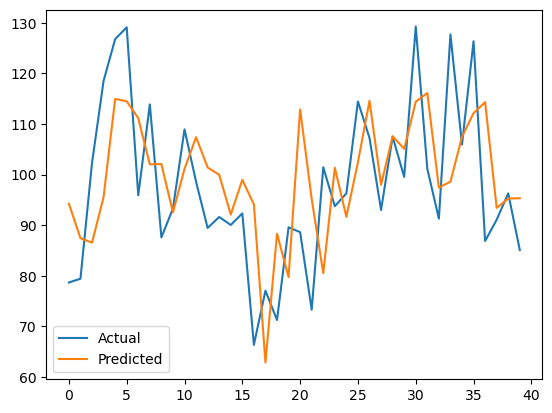

In [48]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_test_pred, label='Predicted')

plt.legend()
plt.show()

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(
    n_estimators=50,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

model.fit(X_train, y_train)

# 4. Make Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 5. Evaluate
print(f"Train Data: RMSE Score: {root_mean_squared_error(y_train, y_train_pred):.2f}")
print(f"Train Data: Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred):.2f}")
print(f"Train Data: Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_train, y_train_pred)*100:.2f}%")
print(f"Train Data: R² Score: {r2_score(y_train, y_train_pred):.2f}")


print(f"Test Data: RMSE Score: {root_mean_squared_error(y_test, y_test_pred):.2f}")
print(f"Test Data: Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred):.2f}")
print(f"Test Data: Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_test_pred)*100:.2f}%")
print(f"Test Data: R² Score: {r2_score(y_test, y_test_pred):.2f}")


Train Data: RMSE Score: 9.02
Train Data: Mean Absolute Error: 6.98
Train Data: Mean Absolute Percentage Error: 7.52%
Train Data: R² Score: 0.87
Test Data: RMSE Score: 14.95
Test Data: Mean Absolute Error: 12.41
Test Data: Mean Absolute Percentage Error: 13.50%
Test Data: R² Score: 0.13


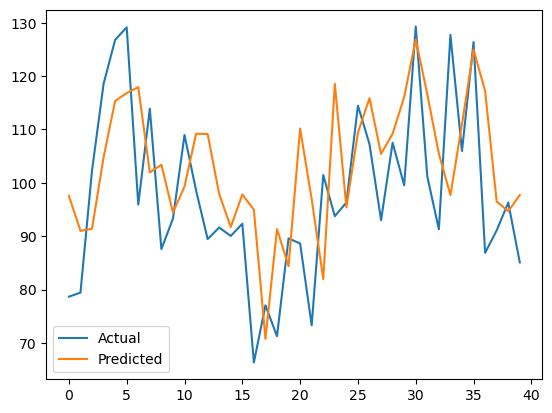

In [50]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_test_pred, label='Predicted')

plt.legend()
plt.show()

In [51]:
from sklearn.linear_model import LinearRegression

# Create model
linear_model = LinearRegression()

# Train model
linear_model.fit(X_train, y_train)

print("Model trained successfully")

y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

print(f"Train Data: RMSE Score: {root_mean_squared_error(y_train, y_train_pred):.2f}")
print(f"Train Data: Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred):.2f}")
print(f"Train Data: Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_train, y_train_pred)*100:.2f}%")
print(f"Train Data: R² Score: {r2_score(y_train, y_train_pred):.2f}")


print(f"Test Data: RMSE Score: {root_mean_squared_error(y_test, y_test_pred):.2f}")
print(f"Test Data: Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred):.2f}")
print(f"Test Data: Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_test_pred)*100:.2f}%")
print(f"Test Data: R² Score: {r2_score(y_test, y_test_pred):.2f}")

Model trained successfully
Train Data: RMSE Score: 12.33
Train Data: Mean Absolute Error: 8.98
Train Data: Mean Absolute Percentage Error: 9.42%
Train Data: R² Score: 0.77
Test Data: RMSE Score: 23.93
Test Data: Mean Absolute Error: 20.94
Test Data: Mean Absolute Percentage Error: 23.44%
Test Data: R² Score: -1.24


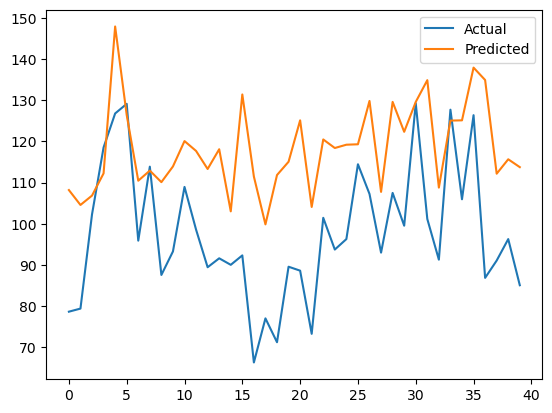

In [52]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_test_pred, label='Predicted')

plt.legend()
plt.show()

In [53]:
from sklearn.linear_model import Ridge

# Create model
ridge_model = Ridge(alpha=1)

# Train model
ridge_model.fit(X_train, y_train)

print("Ridge model trained successfully")

y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

print(f"Train Data: RMSE Score: {root_mean_squared_error(y_train, y_train_pred):.2f}")
print(f"Train Data: Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred):.2f}")
print(f"Train Data: Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_train, y_train_pred)*100:.2f}%")
print(f"Train Data: R² Score: {r2_score(y_train, y_train_pred):.2f}")


print(f"Test Data: RMSE Score: {root_mean_squared_error(y_test, y_test_pred):.2f}")
print(f"Test Data: Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred):.2f}")
print(f"Test Data: Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_test_pred)*100:.2f}%")
print(f"Test Data: R² Score: {r2_score(y_test, y_test_pred):.2f}")

Ridge model trained successfully
Train Data: RMSE Score: 12.42
Train Data: Mean Absolute Error: 8.95
Train Data: Mean Absolute Percentage Error: 9.35%
Train Data: R² Score: 0.76
Test Data: RMSE Score: 19.66
Test Data: Mean Absolute Error: 16.94
Test Data: Mean Absolute Percentage Error: 18.91%
Test Data: R² Score: -0.51
